<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определение-стоимости-автомобилей" data-toc-modified-id="Определение-стоимости-автомобилей-1">Определение стоимости автомобилей</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.1">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-датасета-и-анализ-первичной-информации" data-toc-modified-id="Загрузка-датасета-и-анализ-первичной-информации-1.1.1">Загрузка датасета и анализ первичной информации</a></span></li><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.1.2">Переименование столбцов</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-1.1.3">Удаление дубликатов</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.1.4">Анализ признаков</a></span></li><li><span><a href="#Удаление-маловажных-признаков" data-toc-modified-id="Удаление-маловажных-признаков-1.1.5">Удаление маловажных признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.6">Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.2">Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-1.2.1">Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1.2.1.1">Линейная регрессия</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-1.2.1.2">Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-1.2.1.3">Модель случайного леса</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-1.2.1.4">CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-1.2.1.5">LightGBM</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.2">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-1.3">Анализ моделей</a></span></li><li><span><a href="#Основные-результаты" data-toc-modified-id="Основные-результаты-1.4">Основные результаты</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-1.5">Чек-лист проверки</a></span></li></ul></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов, в котором можно быстро узнать рыночную стоимость своего автомобиля. Имеются исторические данные: технические характеристики, комплектации и цены автомобилей. Требуется построить модель для определения стоимости с учетом важных для заказчика параметров: 
- качество предсказания;
- скорость предсказания;
- время обучения.

Массив данных содержит в себе информацию о характеристиках автомобилей (цену, модель, год выпуска, пробег, год выпуска, тип корбки передач и пр.).

Для решения задачи требуется:

- подготовить данные;
- провести исследовательский анализ данных;
- построить и обучить модель.

## Подготовка данных

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import time
from scipy import stats as st
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Загрузка датасета и анализ первичной информации

In [2]:
cars = pd.read_csv('/datasets/autos.csv')

Получение данных о первых пяти строках таблицы **cars**:

In [3]:
cars.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Общая информация о данных таблицы **cars**:

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


В датафрейме **cars** представлена историческая информация о характеристиках автомобилей и их стоимости: 

- **DateCrawled** — дата скачивания анкеты из базы;
- **VehicleType** — тип автомобильного кузова;
- **RegistrationYear** — год регистрации автомобиля;
- **Gearbox** — тип коробки передач;
- **Power** — мощность (л.с.);
- **Model** — модель автомобиля;
- **Kilometer** — пробег (км);
- **RegistrationMonth** — месяц регистрации автомобиля;
- **FuelType** — тип топлива;
- **Brand** — марка автомобиля;
- **NotRepaired** — была машина в ремонте или нет;
- **DateCreated** — дата создания анкеты;
- **NumberOfPictures** — количество фотографий автомобиля;
- **PostalCode** — почтовый индекс владельца анкеты (пользователя);
- **LastSeen** — дата последней активности пользователя;
- **Price** — цена (евро).

Общее количество объектов - 354 369, все данные либо целочисленного, либо строкового типа. Встречаются пропуски. Проверим, какова их доля:

In [5]:
cars.isna().sum() / cars.shape[0]

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

Больше всего информации пропущено в столбце **NotRepaired** - 20%. Не хватает 10,6% данных в столбце **VehicleType**, 9,2% - в **FuelType** и по 5,6% - в столбцах **Gearbox** и **Model**. Это довольно много. В дальнейшем при анализе каждого признака попытаемся восстановить пропущенные значения.

Период, за который доступны данные:

In [6]:
print('Даты создания анкет: с', pd.to_datetime(cars['DateCreated'].min()), \
      'по', pd.to_datetime(cars['DateCreated'].max()))
print('Даты скачивания анкет из базы: с', pd.to_datetime(cars['DateCrawled'].min()), \
      'по', pd.to_datetime(cars['DateCrawled'].max()))

Даты создания анкет: с 2014-03-10 00:00:00 по 2016-04-07 00:00:00
Даты скачивания анкет из базы: с 2016-03-05 14:06:22 по 2016-04-07 14:36:58


Как видно, заказчик в течение месяца (март-апрель 2016 г.) формировал базу автомобилей, скачав огромное количество анкет, созданных за период с марта 2014 по апрель 2016 г.

---

Подготовим исходные данные для дальнейшего исследования и построения прогноза.

### Переименование столбцов

Переименуем столбцы в соответствии с общепринятой практикой:

In [7]:
# функция принимает на вход строку и ставит перед каждой заглавной буквой, кроме первой, символ "_", 
# после чего приводит все буквы к нижнему регистру

def convert(string):
    return re.sub( '(?<!^)(?=[A-Z])', '_', string).lower()

In [8]:
cars = cars.rename(columns = lambda x: convert(x))

Столбцы переименованы.

Также поменяем их местами для более удобного восприятия информации:

In [9]:
column_new_order = ['brand', 'registration_year', 'registration_month', 'model', 'vehicle_type', 'gearbox', 'power', \
                    'fuel_type', 'kilometer', 'not_repaired', 'date_created', 'number_of_pictures', 'postal_code', \
                    'last_seen', 'date_crawled', 'price']
cars = cars.reindex(columns = column_new_order)

In [10]:
cars.head()

,brand,registration_year,registration_month,model,vehicle_type,gearbox,power,fuel_type,kilometer,not_repaired,date_created,number_of_pictures,postal_code,last_seen,date_crawled,price
0,volkswagen,1993,0,golf,NaN,manual,0,petrol,150000,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57,2016-03-24 11:52:17,480
1,audi,2011,5,NaN,coupe,manual,190,gasoline,125000,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50,2016-03-24 10:58:45,18300
2,jeep,2004,8,grand,suv,auto,163,gasoline,125000,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46,2016-03-14 12:52:21,9800
3,volkswagen,2001,6,golf,small,manual,75,petrol,150000,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17,2016-03-17 16:54:04,1500
4,skoda,2008,7,fabia,small,manual,69,gasoline,90000,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21,2016-03-31 17:25:20,3600


### Удаление дубликатов

Проверим таблицу на наличие полностью повторяющихся строк:

In [11]:
cars.duplicated().sum()

4

В данных встречаются полностью одинаковые строки. Удалим их:

In [12]:
cars = cars.drop_duplicates().reset_index(drop = True)
cars.duplicated().sum()

0

Полные дубликаты удалены.

### Анализ признаков

Теперь рассмотрим отдельно каждый столбец на предмет наличия ошибок в данных, аномалий и пр. Начнем с целевой переменной - стоимости автомобиля.

**price - цена**

In [13]:
cars['price'].describe()

count    354365.000000
mean       4416.679830
std        4514.176349
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

Минимальная стоимость - 0 евро, максимальная - 20 000. Средняя цена составляет 4 416 евро и существенно больше медианной - 2 700 евро. Даже принимая во внимание, что речь идет о 2014-2016 годах, значения выглядят довольно низкими.

Построим график распределения:

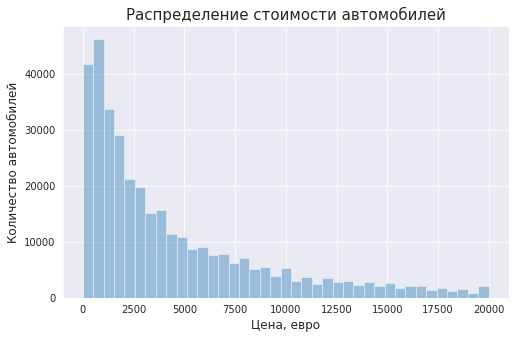

In [14]:
plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
fig = sns.distplot(cars['price'], kde = False, bins = np.linspace(start = 0, stop = 20000, num = 40))
fig.set_title("Распределение стоимости автомобилей", fontsize = 15)
fig.set_xlabel("Цена, евро", fontsize = 12)
fig.set_ylabel("Количество автомобилей", fontsize = 12)

plt.show()

В датасете преобладают модели с низкой ценой (50% стоят не более 2 700 евро), распределение признака резко убывает. Более того, достоточно много нулевых значений (3%): 

In [15]:
print(cars.query('price == 0')['price'].count())
print((cars.query('price == 0')['price'].count() / cars.shape[0]).round(5))

10772
0.0304


Неясно, откуда взялась эта аномалия, однако на случайные выбросы это не похоже. Возможно, в базе данных попадается довольно большое количество автомобилей в настолько плохом состоянии, что их невозможно продать. С другой стороны, нулевое значение может стоять в том случае, если в исходном объявлении цена не была указана. Пока не будем удалять строки с нулевыми значениями. Возможно, после предварительного анализа данных (и удаления части строк) их концентрация уменьшится.

**brand — марка автомобиля**

В датафрейме содержатся данные об автомобилях 40 марок:

In [16]:
print(cars['brand'].nunique())

40


Пропусков нет:

In [17]:
display(cars['brand'].isna().sum())

0

In [18]:
print(cars['brand'].unique())

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'toyota' 'chevrolet' 'dacia'
 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'porsche'
 'rover' 'land_rover' 'lada']


Необычных значений нет за исключением некого *sonstige_autos*, что в переводе с немецкого означает "другое авто". Название, по-видимому, использовалось для объединения еще более редких марок в одну группу. 

Выведем 10 самых встречаемых марок:

In [19]:
br = pd.DataFrame(cars['brand'].value_counts()).reset_index() \
    .merge(cars['brand'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'brand', 'brand_x' : 'abs_n', 'brand_y' : 'prop'})
br.head(10)

,brand,abs_n,prop
0,volkswagen,77012,0.217324
1,opel,39931,0.112683
2,bmw,36914,0.104169
3,mercedes_benz,32044,0.090427
4,audi,29456,0.083123
5,ford,25179,0.071054
6,renault,17927,0.050589
7,peugeot,10998,0.031036
8,fiat,9643,0.027212
9,seat,6907,0.019491


Как видно, можно выделить лишь несколько марок, встречаемых относительно часто. 

Построим распределение. Для наглядности выведем только те марки, доля которых в общей выборке не менее 1%.

In [20]:
#вспомогательная функция для отображения процентов на графике
#принимает на вход название графика, сдвиг надписи по горизонтали и по вертикали

def show_percent(figure, shift, height):
    totals = []
    for i in figure.patches:
        totals.append(i.get_height())
    
    total = sum(totals)

    for i in figure.patches:
        figure.text(i.get_x() + shift, i.get_height() + height, \
            str(round((i.get_height() / total) * 100, 2)) + '%', fontsize = 12,
                color = 'black')

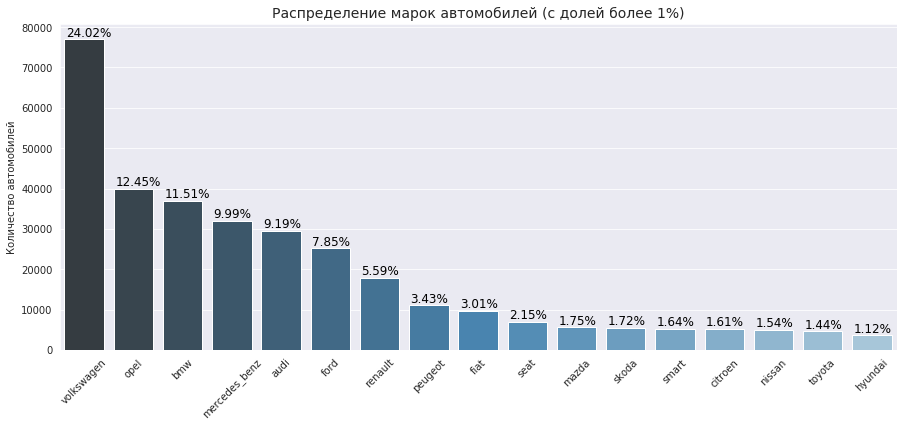

In [21]:
plt.figure(figsize=(15, 6))
sns.set_style("darkgrid")
fig = sns.barplot(x = br.query('prop >= 0.01')['brand'], y = br.query('prop >= 0.01')['abs_n'], palette = "Blues_d")
fig.set_title("Распределение марок автомобилей (с долей более 1%)", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
plt.xticks(rotation = 45)
show_percent(fig, 0.03, 800)

Безусловный лидер - Фольксваген. Также довольно часто встречаются Опель, BMW, Мерседес-Бенц, Ауди и Форд.

**registration_year — год регистрации автомобиля**

Толковать значение этой переменной можно двояко: как год выпуска машины или как год, в котором последний владелец поставил ее на учет. Посмотрим на статистики и распределение признака:

In [22]:
cars['registration_year'].describe()

count    354365.000000
mean       2004.234481
std          90.228466
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

В столбце явно встречаются аномальные значения: ожидаемый год регистрации должен попасть в промежуток примерно с 1900 по 2022 гг. В нашей выборке переменная принимает значения от 1000 до 9999. Посмотрим, сколько таких записей:

In [23]:
cars.query('registration_year < 1900 | registration_year > 2022')['registration_year'].count()

171

Таких значений всего 0,048%, поэтому можно без последствий удалить их из датасета:

In [24]:
cars = cars.loc[(1900 <= cars['registration_year']) & (cars['registration_year'] <= 2022 )]

После удаления заведомо неверных значений статистики примут вид:

In [25]:
cars['registration_year'].describe()

count    354194.000000
mean       2003.084809
std           7.536457
min        1910.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        2019.000000
Name: registration_year, dtype: float64

Теперь можно сделать вывод о том, что год регистрации - это год выпуска автомобиля. В датасете встречаются ретро-машины начала ХХ века. Половина автомобилей выпущена не позднее 2003 года.

Как ни странно, около 4% машин выпущены после 2016 г., когда были созданы самые поздние анкеты. Однако оставим это на совести составителей датасета и не будем удалять соответствующие строки.

In [26]:
cars.query('registration_year > 2016')['registration_year'].count()

14425

Посмотрим на график распределения, отрезав 1% значений с левого хвоста:

In [27]:
np.percentile(cars['registration_year'], 1)

1980.0

In [28]:
reg_y = cars.groupby(by = 'registration_year').agg({'brand' : 'count'}).reset_index()\
                         .rename(columns = {'brand':'n'}).sort_values(by = 'n', ascending = False)

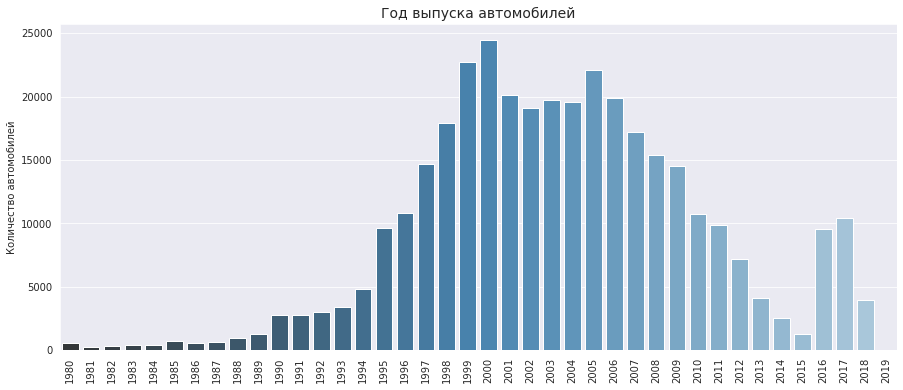

In [29]:
plt.figure(figsize=(15, 6))
fig = sns.barplot(x = reg_y.query('registration_year >= 1980')['registration_year'], \
                  y = reg_y.query('registration_year >= 1980')['n'], palette = "Blues_d");
fig.set_title("Год выпуска автомобилей", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
plt.xticks(rotation = 90)
plt.show()

Основная часть автомобилей датасета выпущена в 1997-2009 гг.

**registration_month — месяц регистрации автомобиля**

Посмотрим на распределение:

In [30]:
cars['registration_month'].describe()

count    354194.000000
mean          5.716825
std           3.725551
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registration_month, dtype: float64

In [31]:
reg_m = cars.groupby(by = 'registration_month').agg({'brand' : 'count'}).reset_index()\
                         .rename(columns = {'brand':'n'}).sort_values(by = 'n', ascending = False)

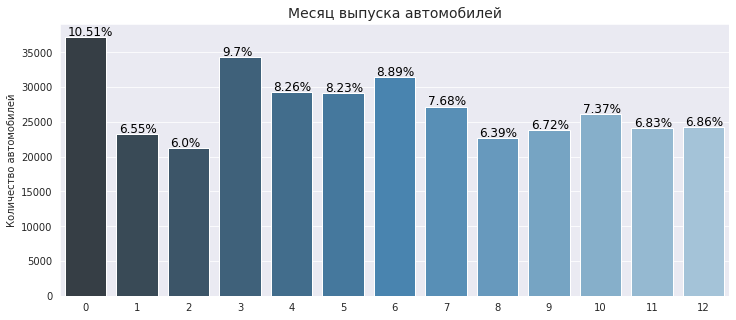

In [32]:
plt.figure(figsize=(12, 5))
fig = sns.barplot(x = 'registration_month', y = 'n', data = reg_m, palette = "Blues_d");
fig.set_title("Месяц выпуска автомобилей", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.05, 200)
plt.show()

Обратим внимание, что в выборке не 12, а 13 месяцев. Чаще всего встречается месяц с номером ноль. Скорее всего, он соответствует пропущенным значениям, вместо которых указали нули. Заменить их на реальные данные нет возможности.

Вообще говоря, крайне маловероятно, что месяц выпуска влияет на стоимость машины. А поскольку в соответствующем столбце еще и 10% некорректных данных, это может негативно повлиять на прогнозируемые значения при постройке моделей. Удалим столбец из датасета:

In [33]:
cars = cars.drop(['registration_month'], axis = 1)

**model — модель автомобиля**

Теперь рассмотрим признак модели автомобиля.

In [34]:
cars['model'].nunique() 

250

In [35]:
cars['model'].unique() 

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Похоже, что некорректных названий моделей машин в датасете нет. График распределения выводить бессмысленно - слишком большое число уникальных значений. Посмотрим на самые часто встречаемые: 

In [36]:
display(cars['model'].value_counts().head()) 
display(cars['model'].value_counts(normalize = True).head()) 

golf     29218
other    24402
3er      19756
polo     13063
corsa    12564
Name: model, dtype: int64

golf     0.087332
other    0.072937
3er      0.059050
polo     0.039045
corsa    0.037553
Name: model, dtype: float64

Как мы помним, в столбце **model** около 5,5% пропущенных значений. Восстановим их, используя самое часто встречаемое значение **model** по группам с соотвтествующими параметрами **brand** и **registration_year**:

In [37]:
cars['model'].isna().sum()

19630

In [38]:
cars['model'] = cars.groupby(['brand', 'registration_year'])['model']\
                    .transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "unknown")))

In [39]:
cars['model'].describe()

count     354194
unique       251
top         golf
freq       32672
Name: model, dtype: object

Теперь все ячейки стобца заполнены. Посмотрим, для какого количества строк не удалось определить моду:

In [40]:
cars.query('model == "unknown"')['model'].count()

3375

Это гораздо лучше, чем 19 630 пропусков изначально.

Снова посмотрим на самые популярные модели:

In [41]:
display(cars['model'].value_counts().head()) 
display(cars['model'].value_counts(normalize = True).head()) 

golf     32672
other    25877
3er      21635
corsa    13880
polo     13063
Name: model, dtype: int64

golf     0.092243
other    0.073059
3er      0.061082
corsa    0.039188
polo     0.036881
Name: model, dtype: float64

Доли всех моделей незначительно подросли, Corsa и Polo поменялись местами.

**vehicle_type — тип автомобильного кузова**

Посмотрим на принимаемые значения переменной и их частоту:

In [42]:
vt = cars['vehicle_type'].value_counts().to_frame().reset_index() \
    .merge(cars['vehicle_type'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'vehicle_type', 'vehicle_type_x' : 'abs_n', 'vehicle_type_y' : 'prop'})
vt

,vehicle_type,abs_n,prop
0,sedan,91457,0.288622
1,small,79830,0.251929
2,wagon,65165,0.205649
3,bus,28775,0.090809
4,convertible,20203,0.063757
5,coupe,16161,0.051001
6,suv,11996,0.037857
7,other,3288,0.010376


Итого 8 типов автомобильного кузова. Некорректных значений нет. Построим график распределения:

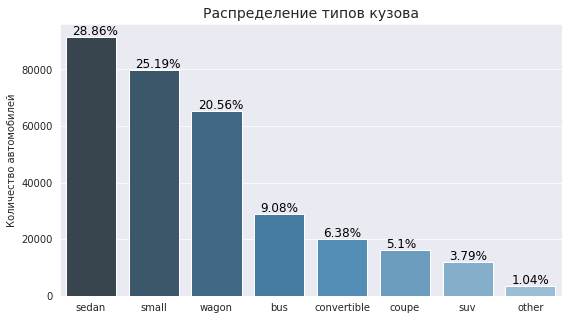

In [43]:
plt.figure(figsize=(9, 5))
fig = sns.barplot(x = 'vehicle_type', y = 'abs_n', data = vt, palette = "Blues_d");
fig.set_title("Распределение типов кузова", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.10, 800)

Преобладают автомобили с кузовом типа седан, small (возможно, так обозначен мини) и универсал.

Как мы помним, в столбце **vehicle_type** около 10% пропусков:

In [44]:
display(cars['vehicle_type'].isna().sum())
display((cars['vehicle_type'].isna().sum() / cars.shape[0]).round(5))

37319

0.10536

Логичнее всего привязать тип кузова к марке и модели автомобиля и заполнить самым часто встречаемым значением:

In [45]:
cars['vehicle_type'] = cars.groupby(['brand', 'model'])['vehicle_type']\
                    .transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "unknown")))

In [46]:
vt = cars['vehicle_type'].value_counts().to_frame().reset_index() \
    .merge(cars['vehicle_type'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'vehicle_type', 'vehicle_type_x' : 'abs_n', 'vehicle_type_y' : 'prop'})
vt

,vehicle_type,abs_n,prop
0,sedan,108265,0.305666
1,small,91026,0.256995
2,wagon,69148,0.195226
3,bus,32392,0.091453
4,convertible,20485,0.057836
5,coupe,16828,0.047511
6,suv,12731,0.035944
7,other,3316,0.009362
8,unknown,3,0.000008


Удалим строки с тремя незаполненными значениями:

In [47]:
cars = cars.loc[cars['vehicle_type'] != 'unknown']

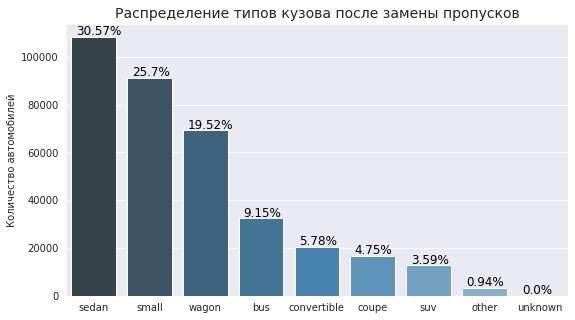

In [48]:
plt.figure(figsize=(9, 5))
fig = sns.barplot(x = 'vehicle_type', y = 'abs_n', data = vt, palette = "Blues_d");
fig.set_title("Распределение типов кузова после замены пропусков", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.08, 800)

Почти все значения были восстановлены. График распределения существенно не изменился.

**gearbox — тип коробки передач**

Посмотрим на принимаемые значения переменной и их частоту:

In [49]:
gb = cars['gearbox'].value_counts().to_frame().reset_index() \
    .merge(cars['gearbox'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'gearbox', 'gearbox_x' : 'abs_n', 'gearbox_y' : 'prop'})
gb

,gearbox,abs_n,prop
0,manual,268223,0.801865
1,auto,66276,0.198135


Переменная принимает два значения - *manual* и *auto*. Некорректных значений нет. Машины с механической коробкой передач составляют 80%.

В столбце **gearbox** 5,5% пропусков:

In [50]:
display(cars['gearbox'].isna().sum())
display((cars['gearbox'].isna().sum() / cars.shape[0]).round(5))

19692

0.0556

Как и ранее, привяжем коробку передач к марке и модели автомобиля и заполним самым часто встречаемым значением:

In [51]:
cars['gearbox'] = cars.groupby(['brand', 'model'])['gearbox']\
                    .transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "unknown")))

In [52]:
gb = cars['gearbox'].value_counts().to_frame().reset_index() \
    .merge(cars['gearbox'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'gearbox', 'gearbox_x' : 'abs_n', 'gearbox_y' : 'prop'})
gb

,gearbox,abs_n,prop
0,manual,285797,0.806901
1,auto,68393,0.193096
2,unknown,1,0.000003


Удалим строки с четырьмя незаполненными значениями:

In [53]:
cars = cars.loc[cars['gearbox'] != 'unknown']

Вообще говоря, не совсем корректно привязывать тип коробки передач к модели машины, поскольку они могут быть разной комплектации. Тем не менее, пропорции между машинами с ручной и автоматической коробкой передач не изменились, что говорит об относительно равномерном заполнении данных. Этот вариант более приемлем по сравнению с необходимостью удаления из датасета 5,5% строк. 

**power — мощность (л.с.)**

In [54]:
cars['power'].describe()

count    354190.000000
mean        110.078794
std         189.538470
min           0.000000
25%          69.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

Минимальная мощность - 0 л.с., максимальная - 20 000 л.с. Средняя мощность составляет 110 л.с. а медианная - 105 л.с. Пропусков в столбце нет.

И минимальное, и максимальное значение вызывают вопросы. Возможно, это выбросы. Проверим 5%-й и 95%-й квантили:

In [55]:
print(np.percentile(cars['power'], 1))
print(np.percentile(cars['power'], 99))

0.0
300.0


Судя по всему, нулевых значений действительно много, а аномальных максимальных - нет. Построим график распределения, обрезав 1% значений справа:

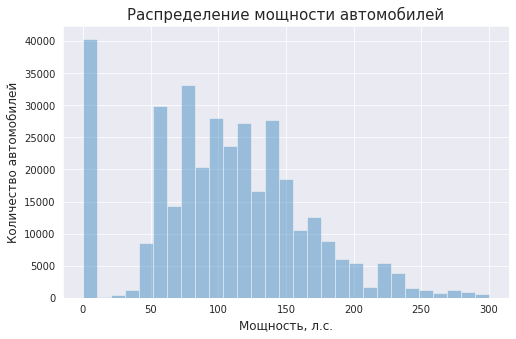

In [56]:
plt.figure(figsize=(8, 5))
fig = sns.distplot(cars['power'], kde = False, bins = np.linspace(start = 0, stop = 300, num = 30))
fig.set_title("Распределение мощности автомобилей", fontsize = 15)
fig.set_xlabel("Мощность, л.с.", fontsize = 12)
fig.set_ylabel("Количество автомобилей", fontsize = 12)

plt.show()

Во-первых, удалим из датасета записи, где мощность автомобиля выше 5 000 л.с.(они настолько уникальны, что крайне маловероятна их продажа через наш сервис). Их доля незначительна:

In [57]:
print((cars.query('power > 5000')['power'].count() / cars.shape[0]).round(5))

0.00023


In [58]:
cars = cars.loc[cars['power'] <= 5000]

Во-вторых, так как нулей довольно много, заменим их, как было сделано выше, на самое частое значение по группам, объединенным по признакам марки и модели:

In [59]:
cars.loc[cars['power'] == 0, 'power'] = None
cars['power'] = cars.groupby(['brand', 'model'])['power']\
                    .transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "unknown")))

In [60]:
cars.loc[cars['power'] == 'unknown']['power'].count()

5

Осталось 5 строк с неуказанным значением мощности. Удалим их, вернем переменной исходный тип данных int и посмотрим на распределение:

In [61]:
cars = cars.loc[cars['power'] != 'unknown']

In [62]:
cars['power'] = cars['power'].astype('int')

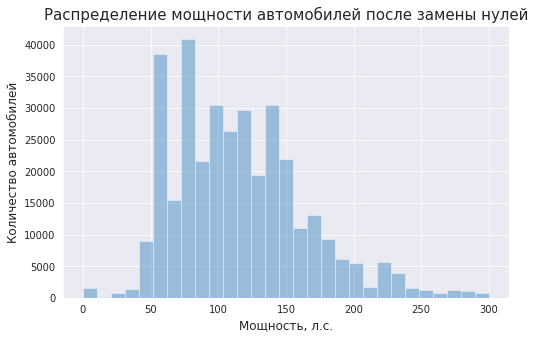

In [63]:
plt.figure(figsize=(8, 5))
fig = sns.distplot(cars['power'], kde = False, bins = np.linspace(start = 0, stop = 300, num = 30))
fig.set_title("Распределение мощности автомобилей после замены нулей", fontsize = 15)
fig.set_xlabel("Мощность, л.с.", fontsize = 12)
fig.set_ylabel("Количество автомобилей", fontsize = 12)

plt.show()

В целом характер распределения остался прежним.

**fuel_type — тип топлива**

In [64]:
ft = cars['fuel_type'].value_counts().to_frame().reset_index() \
    .merge(cars['fuel_type'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'fuel_type', 'fuel_type_x' : 'abs_n', 'fuel_type_y' : 'prop'})
ft

,fuel_type,abs_n,prop
0,petrol,216260,0.672963
1,gasoline,98695,0.307121
2,lpg,5310,0.016524
3,cng,564,0.001755
4,hybrid,233,0.000725
5,other,203,0.000632
6,electric,90,0.000280


В датафрейме 7 типов топлива. Однако бензин встречается дважды - под названием *petrol* и *gasoline* (слово *petrol* обычно используют в Великобритании, а *gasoline* - в США). Приведем такие значения к одному:

In [65]:
cars.loc[cars['fuel_type'] == 'gasoline', 'fuel_type'] = 'petrol'

In [66]:
ft = cars['fuel_type'].value_counts().to_frame().reset_index() \
    .merge(cars['fuel_type'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'fuel_type', 'fuel_type_x' : 'abs_n', 'fuel_type_y' : 'prop'})

Посмотрим на распределение:

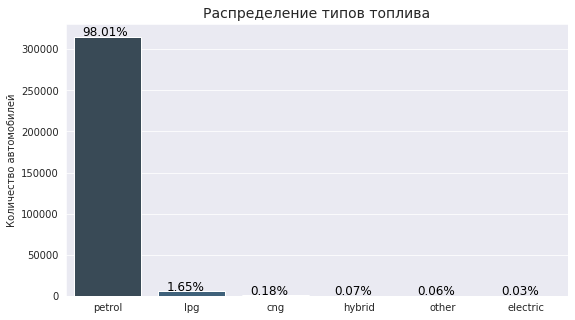

In [67]:
plt.figure(figsize=(9, 5))
fig = sns.barplot(x = 'fuel_type', y = 'abs_n', data = ft, palette = "Blues_d");
fig.set_title("Распределение типов топлива", fontsize = 14)
fig.set_ylabel("Количество автомобилей", fontsize = 10)
fig.set_xlabel("")
show_percent(fig, 0.10, 800)

Подавляющее большинство автомобилей заправляется бензином.

Как мы помним, в столбце **fuel_type** были пропуски:

In [68]:
display(cars['fuel_type'].isna().sum())
display((cars['fuel_type'].isna().sum() / cars.shape[0]).round(5))

32748

0.09248

В очередной раз привяжем признак к марке и модели автомобиля и заполним самым часто встречаемым значением:

In [69]:
cars['fuel_type'] = cars.groupby(['brand', 'model'])['fuel_type']\
                    .transform(lambda x: x.fillna((x.mode()[0] if not x.mode().empty else "unknown")))

In [70]:
ft = cars['fuel_type'].value_counts().to_frame().reset_index() \
    .merge(cars['fuel_type'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'fuel_type', 'fuel_type_x' : 'abs_n', 'fuel_type_y' : 'prop'})
ft

,fuel_type,abs_n,prop
0,petrol,347703,0.981926
1,lpg,5310,0.014996
2,cng,564,0.001593
3,hybrid,233,0.000658
4,other,203,0.000573
5,electric,90,0.000254


Все значения восстановлены, распределение осталось прежним. 98% автомобилей заправляется бензином.

**kilometer — пробег (км)**

In [71]:
cars['kilometer'].describe()

count    354103.000000
mean     128272.084676
std       37817.609051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

Минимальный пробег - 5 000 км, максимальный - 150 000 км. Средний пробег составляет 128 271 км., медианный - 150 000 км. Пропусков в столбце нет.

Медиана совпадает с макисмальным значений, да и среднее находится к нему очень близко. Не менее половины машин в датасете имеют пробег 150 000 км.

Полученные результаты позволяют предположить, что переменная **kilometr** распределена дискретно:

In [72]:
km = cars['kilometer'].value_counts().to_frame().reset_index() \
    .merge(cars['kilometer'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'kilometer', 'kilometer_x' : 'abs_n', 'kilometer_y' : 'prop'})
km

,kilometer,abs_n,prop
0,150000,238154,0.672556
1,125000,36440,0.102908
2,100000,14876,0.042010
3,90000,11564,0.032657
4,80000,10046,0.028370
5,70000,8592,0.024264
6,60000,7442,0.021016
7,5000,6278,0.017729
8,50000,6231,0.017597
9,40000,4911,0.013869


Действительно, переменная принимает фиксированное количество значений. 77,5% автомобилей имеют пробег 125 000 км и выше.

**not_repaired — была машина в ремонте или нет**

Посмотрим на принимаемые значения переменной и их частоту:

In [73]:
rep = cars['not_repaired'].value_counts().to_frame().reset_index() \
    .merge(cars['not_repaired'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'not_repaired', 'not_repaired_x' : 'abs_n', 'not_repaired_y' : 'prop'})
rep

,not_repaired,abs_n,prop
0,no,247100,0.872729
1,yes,36035,0.127271


Переменная принимает два значения - *no* и *yes*. Некорректных значений нет. Большая часть машин побывала в ремонте.

В столбце **not_repaired** самая большая доля пропущенных значений:

In [74]:
display(cars['not_repaired'].isna().sum())
display((cars['not_repaired'].isna().sum() / cars.shape[0]).round(5))

70968

0.20042

Заполним пропуски, исходя из предположения, что если пробег машины не менее 100 000 км, то она побывала в ремонте:

In [75]:
cars.loc[(cars['kilometer'] >= 100000) & (cars['not_repaired'].isna()), 'not_repaired'] = 'no'
cars.loc[(cars['kilometer'] < 100000) & (cars['not_repaired'].isna()), 'not_repaired'] = 'yes'

In [76]:
rep = cars['not_repaired'].value_counts().to_frame().reset_index() \
    .merge(cars['not_repaired'].value_counts(normalize = True).to_frame().reset_index(), on = 'index') \
    .rename(columns = {'index' : 'not_repaired', 'not_repaired_x' : 'abs_n', 'not_repaired_y' : 'prop'})
rep

,not_repaired,abs_n,prop
0,no,307712,0.86899
1,yes,46391,0.13101


Получили, доля что ремонтировавшихся машин составляет около 87%.

**number_of_pictures — количество фотографий автомобиля**

In [77]:
cars['number_of_pictures'].value_counts()

0    354103
Name: number_of_pictures, dtype: int64

Весь столбец состоит из нулей, поэтому не поможет нам при построении моделей.

In [78]:
cars = cars.drop(['number_of_pictures'], axis = 1)

---

Проверим, не отразилось ли заполнение пропусков на количестве дубликатов в датасете (это могло произойти, так как у нас нет столбца с идентификаторами):

In [79]:
cars.duplicated().sum()

1

Удалим дубликат позднее, когда закончим анализ признаков.

### Удаление маловажных признаков

Очевидно, что следующая информация:

- **date_created** — дата создания анкеты,
- **postal_code** — почтовый индекс владельца анкеты (пользователя),
- **last_seen** — дата последней активности пользователя,
- **date_crawled** — дата скачивания анкеты из базы,

не имеет отношения к ценам автомобилей. Удалим их:

In [80]:
to_drop = ['date_created', 'postal_code', 'last_seen', 'date_crawled']

In [81]:
cars = cars.drop(to_drop, axis = 1)

---

Поскольку из таблицы были удалены столбцы, проверим ее еще раз на дубликаты:

In [82]:
cars.duplicated().sum()

64674

Вероятно, разнообразие значений столбцов с датами и почтовыми кодами обеспечивало неповторяемость строк. Удалим получившиеся дубликаты:

In [83]:
cars = cars.drop_duplicates().reset_index(drop = True)

Посмотрим информацию по датасету после проведения окончательных преобразований:

In [84]:
cars.head()

,brand,registration_year,model,vehicle_type,gearbox,power,fuel_type,kilometer,not_repaired,price
0,volkswagen,1993,golf,sedan,manual,75,petrol,150000,no,480
1,audi,2011,a4,coupe,manual,190,petrol,125000,yes,18300
2,jeep,2004,grand,suv,auto,163,petrol,125000,no,9800
3,volkswagen,2001,golf,small,manual,75,petrol,150000,no,1500
4,skoda,2008,fabia,small,manual,69,petrol,90000,no,3600


In [85]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289429 entries, 0 to 289428
Data columns (total 10 columns):
brand                289429 non-null object
registration_year    289429 non-null int64
model                289429 non-null object
vehicle_type         289429 non-null object
gearbox              289429 non-null object
power                289429 non-null int64
fuel_type            289429 non-null object
kilometer            289429 non-null int64
not_repaired         289429 non-null object
price                289429 non-null int64
dtypes: int64(4), object(6)
memory usage: 22.1+ MB


Осталось 10 столбцов и 289 429 строк. Все пропуски заполнены.

### Вывод

Данные подготовлены к дальнейшему анализу:
- переименованы столбцы;
- заполнены пропуски в столбцах **model**, **vehicle_type**, **gearbox**, **fuel_type**, **not_repaired**;
- удалены признаки, не имеющие логической связи с целевой переменной **price**: **registration_month**, **date_created**, **postal_code**, **last_seen**, **date_crawled**;
- удален пустой столбец **number_of_pictures**;
- удалены полностью дублирующиеся строки (около 18% от общего количества);
- проведен исследовательский анализ распределения каждого признака:
    - в целевой переменной **price** встречается значительное количество нулевых значений, не похожих на выбросы. Однако их появление не имеет единой трактовки, поэтому данные остались неизмененными;
    - для переменной **registration_year** удалены аномальные значения (до 1900 и после 2022);
    - для переменной **power** удалены значения выше 5000, а нули заменены на самые часто встречаемые значения в группах, разбитых по признаку марки и модели;
    - для переменной **fuel_type** объединены значения *petrol* и *gasoline*, по сути означающие одно и то же - бензин.


## Обучение моделей

Будем сравнивать работу пяти моделей:
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Так как модели scikit-learn работают только с переменными, представленными в числовом формате, а CatBoost и LightGBM умеют обращаться с категориальными, то сделаем две разные выборки. Для линейной регрессии, дерева решений и случайного леса закодируем категориальные переменные:

In [86]:
cars_ohe = pd.get_dummies(cars, drop_first = True)

In [87]:
features_not_boost = cars_ohe.drop(['price'], axis = 1)
target_not_boost = cars_ohe['price']

Для моделей бустинга кодирование не потребуется, однако категориальным переменным нужно присвоить тип *category*:

In [88]:
cat_features = ['brand', 'model', 'vehicle_type', 'gearbox', 'fuel_type', 'not_repaired']
quant_features = ['registration_year', 'power', 'kilometer']
for col in cat_features:
    cars[col] = cars[col].astype('category')

In [89]:
features_boost = cars.drop(['price'], axis = 1)
target_boost = cars['price']

Разделим данные на обучающую и тестовую выборки в пропорции 3:1:

In [90]:
features_train_not_boost, features_test_not_boost, target_train_not_boost, target_test_not_boost = \
                            train_test_split(features_not_boost, target_not_boost, test_size = 0.25, random_state = 42)

features_train_boost, features_test_boost, target_train_boost, target_test_boost = \
                            train_test_split(features_boost, target_boost, test_size = 0.25, random_state = 42)

Рассматриваемые переменные имеют разный масштаб. Чтобы модели корректно проводили оценку параметров, настроим стандартизацию на обучающей выборке и преобразуем все выборки:

In [91]:
scaler = StandardScaler()

scaler.fit(features_train_not_boost[quant_features])

for data in [features_train_not_boost, features_test_not_boost]:
    data[quant_features] = scaler.transform(data[quant_features])

scaler.fit(features_train_boost[quant_features])

for data in [features_train_boost, features_test_boost]:
    data[quant_features] = scaler.transform(data[quant_features])

Напишем функцию для подсчета метрики RMSE:

In [92]:
def rmse_score(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)**0.5

Функция для поиска оптимального набора гиперпараметров моделей по метрике RMSE:

In [93]:
def grid_search(model, params, features, target):
    
    g_search = GridSearchCV(model, params, cv = 5,\
                                scoring = make_scorer(rmse_score, greater_is_better = False), n_jobs = -1)
    g_search.fit(features, target)
    
    print('Лучший набор гиперпараметров:', g_search.best_params_)
    print('Качество предсказания:', round(g_search.best_score_, 5) * (-1))

Функция для оценки качества результатов модели и времени работы:

In [94]:
# обучает модель на тренировочной выборке и оценивает качество на тестовой;
# также рассчитывает время обучения и предсказания;
# результаты записывает в таблицу.

def model_result(model, features_train, features_test, target_train, target_test, df_result):

    start_fit = time.time()
    model.fit(features_train, target_train)
    end_fit = time.time()
    duration_fit = round(end_fit - start_fit, 3)

    print('Время обучения:', duration_fit, 'с')

    start_pred = time.time()
    predicted = model.predict(features_test)
    end_pred = time.time()
    duration_pred = round(end_pred - start_pred, 3)

    rmse_result = round(rmse_score(target_test, predicted), 3)

    print('Время предсказания:', duration_pred, 'с')
    print('Качество предсказания на тестовой выборке:', rmse_result)
    
    df_result.append({'model': model.__class__.__name__, 'RMSE': rmse_result, 'fit_duration': duration_fit,
                              'predict_duration': duration_pred})

###  Построение моделей

Обучим несколько разных моделей и оценим их качество на тестовой выборке, а также время обучения и предсказания. Записывать результаты будем в отдельную таблицу.

In [95]:
result = []

#### Линейная регрессия

У линейной регрессии нет гиперпараметров, поэтому и метрика качества, и оценка времени сразу будут итоговыми.

In [96]:
model_result(LinearRegression(), features_train_not_boost, features_test_not_boost, 
             target_train_not_boost, target_test_not_boost, result)

Время обучения: 23.293 с
Время предсказания: 0.195 с
Качество предсказания на тестовой выборке: 3140.8


#### Модель решающего дерева

Зададим набор гиперпараметров для модели. Будем изменять глубину дерева, а также количество признаков, которые учитываются при поиске лучшего разделения:

In [97]:
dt_model = DecisionTreeRegressor(random_state = 42)
dt_params = {'max_depth' : range(1, 11, 2), 'max_features' : range(1, 11, 2)}

In [98]:
%%time
grid_search(dt_model, dt_params, features_train_not_boost, target_train_not_boost)

Лучший набор гиперпараметров: {'max_depth': 9, 'max_features': 7}
Качество предсказания: 3421.47145
CPU times: user 1min 11s, sys: 26.1 s, total: 1min 37s
Wall time: 1min 39s


Теперь оценим время обучения и предсказания модели решающего дерева на тестовой выборке при оптимальном значении гиперпараметров:

In [99]:
model_result(DecisionTreeRegressor(random_state = 42, max_depth = 9, max_features = 7),
             features_train_not_boost, features_test_not_boost, 
             target_train_not_boost, target_test_not_boost, result)

Время обучения: 0.497 с
Время предсказания: 0.113 с
Качество предсказания на тестовой выборке: 3761.588


#### Модель случайного леса

В качестве гиперпараметров будем использовать глубину дерева, а также число деревьев:

In [100]:
rf_model = RandomForestRegressor(random_state = 42)
rf_params = {'max_depth' : range(1, 13, 4), 'n_estimators' : range(1, 15, 5)}

In [101]:
%%time
grid_search(rf_model, rf_params, features_train_not_boost, target_train_not_boost)

Лучший набор гиперпараметров: {'max_depth': 9, 'n_estimators': 11}
Качество предсказания: 2216.47497
CPU times: user 6min 37s, sys: 8.9 s, total: 6min 46s
Wall time: 6min 49s


Оценим время обучения и предсказания модели случайного леса на тестовой выборке:

In [102]:
model_result(RandomForestRegressor(random_state = 42, max_depth = 9, n_estimators = 11),
             features_train_not_boost, features_test_not_boost, 
             target_train_not_boost, target_test_not_boost, result)

Время обучения: 32.435 с
Время предсказания: 0.19 с
Качество предсказания на тестовой выборке: 2210.57


In [103]:
pd.DataFrame(result)

,model,RMSE,fit_duration,predict_duration
0,LinearRegression,3140.800,23.293,0.195
1,DecisionTreeRegressor,3761.588,0.497,0.113
2,RandomForestRegressor,2210.570,32.435,0.190


#### CatBoost

В качестве гиперпараметров снова выберем глубину деревьев и их число:

In [104]:
catboost_model = CatBoostRegressor(random_state = 42, cat_features = cat_features, silent = True)
catboost_params = {'n_estimators': range(50, 101, 25), 'max_depth': range(10, 12)}

In [105]:
%%time
grid_search(catboost_model, catboost_params, features_train_boost, target_train_boost)

Лучший набор гиперпараметров: {'max_depth': 11, 'n_estimators': 100}
Качество предсказания: 2088.85795
CPU times: user 9min 58s, sys: 1min 42s, total: 11min 41s
Wall time: 12min 17s


Оценим время обучения и предсказания модели CatBoost:

In [106]:
model_result(CatBoostRegressor(random_state = 42, cat_features = cat_features, max_depth = 11, 
                               n_estimators = 100, silent = True),
             features_train_boost, features_test_boost, 
             target_train_boost, target_test_boost, result)

Время обучения: 37.564 с
Время предсказания: 0.108 с
Качество предсказания на тестовой выборке: 2088.832


In [107]:
pd.DataFrame(result)

,model,RMSE,fit_duration,predict_duration
0,LinearRegression,3140.800,23.293,0.195
1,DecisionTreeRegressor,3761.588,0.497,0.113
2,RandomForestRegressor,2210.570,32.435,0.190
3,CatBoostRegressor,2088.832,37.564,0.108


#### LightGBM

И вновь качестве гиперпараметров возьмем число деревьев и их максимальную глубину:

In [108]:
lgb_model = LGBMRegressor(random_state = 42)
lgb_params = {'n_estimators': range(50, 101, 25), 'max_depth': range(10, 12)}

В отличие от CatBoostRegressor, в параметрах модели LGBMRegressor нельзя указать, какие переменные являются категориальными. Это можно сделать в методе fit, поэтому немного изменим ранее созданные функции:

In [109]:
def grid_search_lgb(model, params, features, target):
    
    g_search = GridSearchCV(model, params, cv = 5,\
                                scoring = make_scorer(rmse_score, greater_is_better = False), n_jobs = -1)
    g_search.fit(features, target, categorical_feature = cat_features)
    
    print('Лучший набор гиперпараметров:', g_search.best_params_)
    print('Качество предсказания:', round(g_search.best_score_, 5) * (-1))

In [110]:
%%time
grid_search_lgb(lgb_model, lgb_params, features_train_boost, target_train_boost)

Лучший набор гиперпараметров: {'max_depth': 10, 'n_estimators': 100}
Качество предсказания: 1906.10887
CPU times: user 3min 6s, sys: 1.11 s, total: 3min 7s
Wall time: 3min 10s


Оценим время обучения и предсказания LightGBM:

In [111]:
lgb_model = LGBMRegressor(random_state = 42, n_estimators = 100, max_depth = 10)

start_fit = time.time()
lgb_model.fit(features_train_boost, target_train_boost, categorical_feature = cat_features)
end_fit = time.time()
duration_fit = round(end_fit - start_fit, 3)

print('Время обучения:', duration_fit, 'с')

start_pred = time.time()
predicted_lgb = lgb_model.predict(features_test_boost)
end_pred = time.time()
duration_pred = round(end_pred - start_pred, 3)

rmse_lgb = round(rmse_score(target_test_boost, predicted_lgb), 3)

print('Время предсказания:', duration_pred, 'с')
print('Качество предсказания на тестовой выборке:', rmse_lgb)

result.append({'model': lgb_model.__class__.__name__, 'RMSE': rmse_lgb, 'fit_duration': duration_fit,
                              'predict_duration': duration_pred})

Время обучения: 8.095 с
Время предсказания: 0.803 с
Качество предсказания на тестовой выборке: 1900.923


### Вывод

Построены и обучены следующие модели:
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Для обучения и оценки моделей датасет разбит на обучающую и тестовую выборки в пропорции 3:1. Для моделей случайной регрессии, дерева решений и случайного леса категориальные признаки закодированы с помощью one-hot encoding. Для CatBoost и LightGBM категориальным признакам присвоен тип *category*.

Данные стандартизированы. Написана функция для использования метрики RMSE в качестве скорера.

Для каждой модели (за исключением линейной регрессии) с помощью метода GridSerchCV подбиралиись оптимальные гиперпараметры: для решающего дерева - глубина, а также количество признаков, учитываемых при поиске лучшего разделения. Для остальных моделей - глубина и число деревьев.

Модели с оптимальными параметрами обучены на тренировочной и проверены на тестовой выборке. Сравнение приведено в заключительном разделе.

## Анализ моделей

Посмотрим на итоговую таблицу:

In [112]:
pd.DataFrame(result).sort_values(by = 'RMSE')

,model,RMSE,fit_duration,predict_duration
4,LGBMRegressor,1900.923,8.095,0.803
3,CatBoostRegressor,2088.832,37.564,0.108
2,RandomForestRegressor,2210.570,32.435,0.190
0,LinearRegression,3140.800,23.293,0.195
1,DecisionTreeRegressor,3761.588,0.497,0.113


Лучшие результаты по качеству показали модели на основе градиентного бустинга. RMSE у LightGBM немного ниже (т.е. качество выше), гораздо быстрее происходит обучение, однако CatBoost значительно быстрее делает предсказание.

Близкий к градиентному бустингу результат показала модель случайного леса. Ее RMSE немного хуже, зато обучается она быстрее CatBoost и предсказывает почти так же быстро..

Линейная регрессия и дерево решений заметно уступают остальным моделям по качеству предсказаний. Однако стоит отметить, что время предсказания дерева решений на два порядка меньше, чем у всех остальных моделей. 

Вероятно, экспериментируя с гиперпараметрами дальше, получится найти более удачный набор, что позволит снизить ошибки моделей.

## Основные результаты

В работе решалась задача прогнозирования цены автомобилей и сравнения моделей по качеству предсказания и времени обучения и прогнозирования.

В ходе предварительного анализа данных: 
- заполнены пропуски в ряде столбцов на основе самых часто встречаемых значений в разрезе марок и моделей автомобилей;
- удалены признаки, не имеющие логической связи с целевой переменной **price**;
- удалены полностью дублирующиеся строки (около 18% от общего количества);
- для ряда признаков удалены аномальные зачения, нули заменены на самые часто встречаемые значения в группах.

Для решения задачи прогнозирования обучены и протестированы пять моделей: 
- линейной регрессии;
- дерева решений;
- случайного леса;
- CatBoost;
- LightGBM.

Датасет разделен на тренировочную и тестовую выборки в пропорции 3:1. Данные стандартизированы. В качестве метрики использовалась RSME.

Для каждой модели (за исключением линейной регрессии) подбиралиись оптимальные гиперпараметры: для решающего дерева - глубина, а также количество признаков, учитываемых при поиске лучшего разделения. Для остальных моделей - глубина и число деревьев.

Лучшие результаты по значению метрики показали модели на основе градиентного бустинга. Самое высокое качество оказалось у LightGBM (RMSE = 1901). Эта модель также быстрее всех обучается (кроме линейного дерева). Однако CatBoost значительно быстрее делает предсказание (0,1 сек. против 0,8 сек.). RMSE CatBoost - 2089.

Близкий к градиентному бустингу результат показала модель случайного леса. Ее RMSE несколько хуже (2210), зато предсказывет она почти так же быстро, как CatBoost (0,19 сек.).

Линейная регрессия и дерево решений заметно уступают остальным моделям по качеству предсказаний. Однако стоит отметить, что время предсказания дерева решений на два порядка меньше, чем у всех остальных моделей.